In [61]:
import pandas as pd

df = pd.read_csv('retail_case_data.csv')
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1


In [62]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [63]:
age_response = df[['Year_Birth', 'Response']]

# Calcula a média, mediana, desvio padrão, etc.
stats = age_response.describe()
print(stats)

        Year_Birth     Response
count  2240.000000  2240.000000
mean   1968.805804     0.149107
std      11.984069     0.356274
min    1893.000000     0.000000
25%    1959.000000     0.000000
50%    1970.000000     0.000000
75%    1977.000000     0.000000
max    1996.000000     1.000000


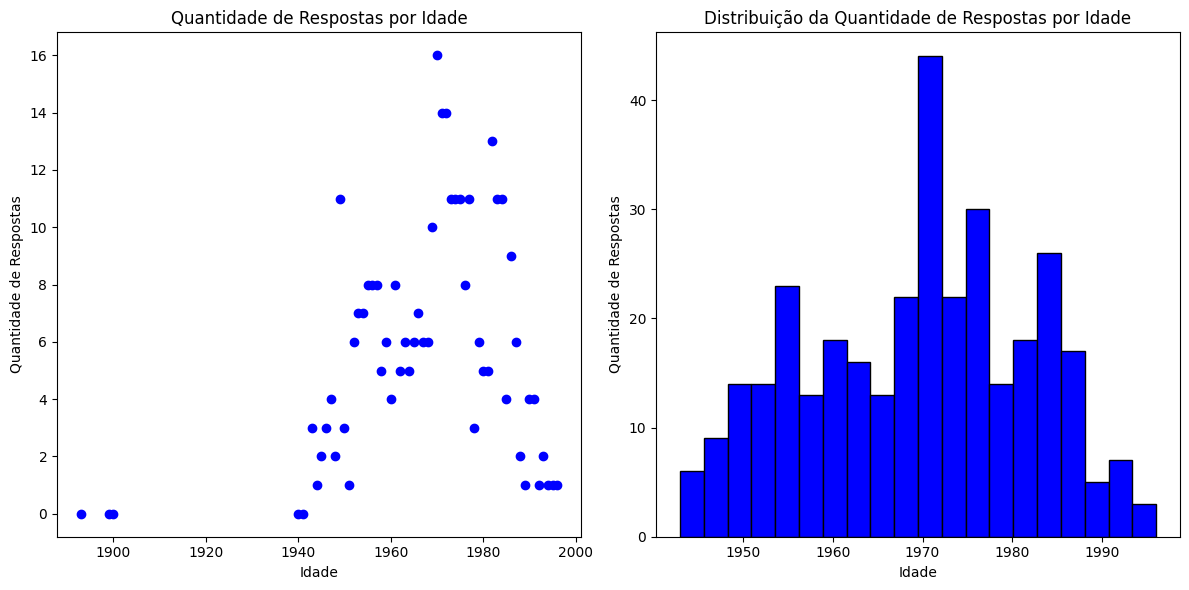

In [64]:
import matplotlib.pyplot as plt
age_response_count = df.groupby('Year_Birth')['Response'].sum()
# Filtra os dados para incluir apenas aqueles com resposta igual a 1
response_data = df[df['Response'] == 1]
# Cria uma figura e subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersão
axs[0].scatter(age_response_count.index, age_response_count.values, color='blue')
axs[0].set_xlabel('Idade')
axs[0].set_ylabel('Quantidade de Respostas')
axs[0].set_title('Quantidade de Respostas por Idade')

# Histograma
axs[1].hist(response_data['Year_Birth'], bins=20, color='blue', edgecolor='black')
axs[1].set_xlabel('Idade')
axs[1].set_ylabel('Quantidade de Respostas')
axs[1].set_title('Distribuição da Quantidade de Respostas por Idade')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

#Resposta: Conseguimos verificar que a galera de 1970 tem maior qtd de resposta comparado ao outros,
#e vendo por um outro lado, a galera mais nova não tem uma quantidade de resposta tão boa quanto os mais velhos

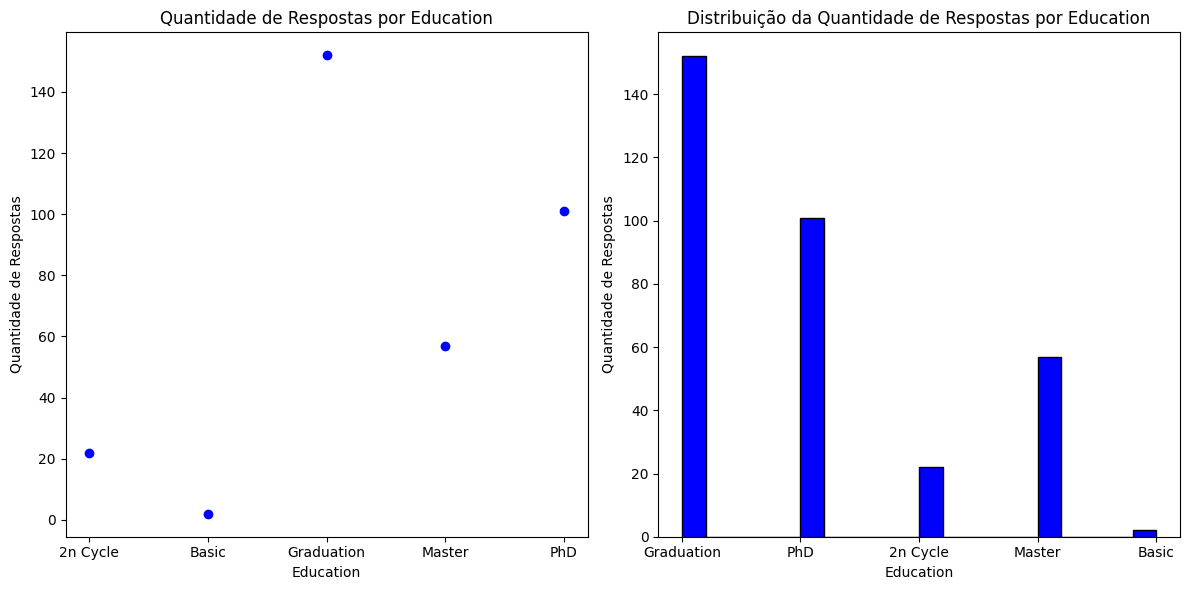

In [65]:
age_response_count = df.groupby('Education')['Response'].sum()
# Filtra os dados para incluir apenas aqueles com resposta igual a 1
response_data = df[df['Response'] == 1]

age_response = df[['Education', 'Response']]
# Cria uma figura e subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersão
axs[0].scatter(age_response_count.index, age_response_count.values, color='blue')
axs[0].set_xlabel('Education')
axs[0].set_ylabel('Quantidade de Respostas')
axs[0].set_title('Quantidade de Respostas por Education')

# Histograma
axs[1].hist(response_data['Education'], bins=20, color='blue', edgecolor='black')
axs[1].set_xlabel('Education')
axs[1].set_ylabel('Quantidade de Respostas')
axs[1].set_title('Distribuição da Quantidade de Respostas por Education')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

#Resposta: Conseguimos verificar que a galera com gradução tem uma maior qtd de resposta
#além disso, podemos ver que quem tem graduação, PHD e Mestrado, tem uma grande chance de responder do que
#a galera que está no ensino inferior

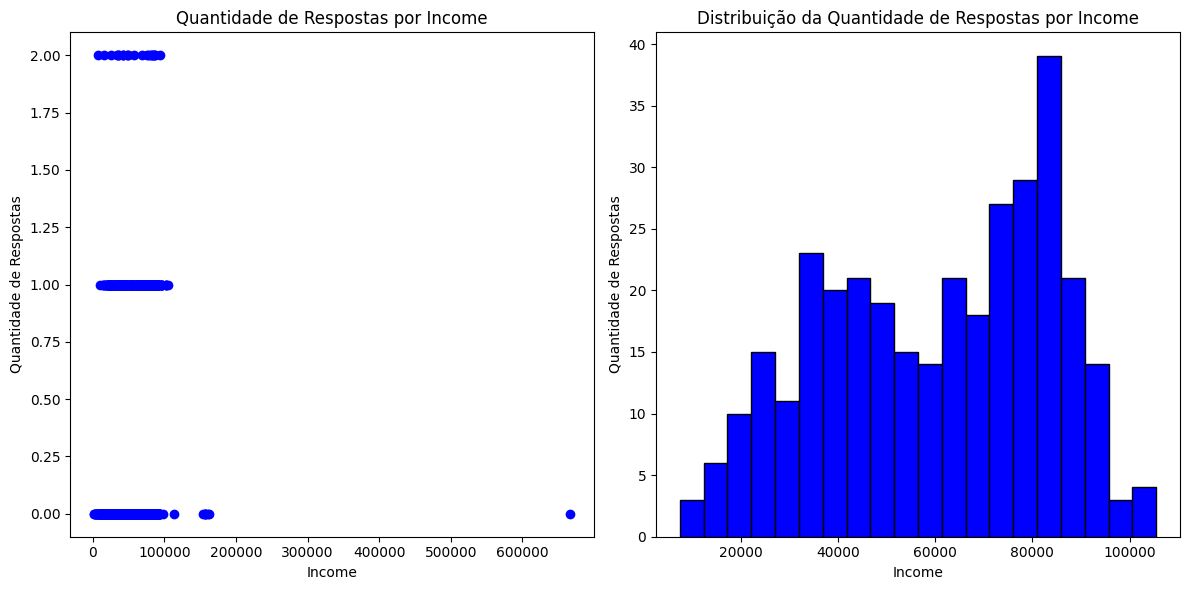

In [66]:
age_response_count = df.groupby('Income')['Response'].sum()
# Filtra os dados para incluir apenas aqueles com resposta igual a 1
response_data = df[df['Response'] == 1]

age_response = df[['Income', 'Response']]
# Cria uma figura e subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersão
axs[0].scatter(age_response_count.index, age_response_count.values, color='blue')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Quantidade de Respostas')
axs[0].set_title('Quantidade de Respostas por Income')

# Histograma
axs[1].hist(response_data['Income'], bins=20, color='blue', edgecolor='black')
axs[1].set_xlabel('Income')
axs[1].set_ylabel('Quantidade de Respostas')
axs[1].set_title('Distribuição da Quantidade de Respostas por Income')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

#Resposta: Conseguimos verificar que quem possui a renda de 70K até 85K, tem uma grande qtd de resposta
#mas conseguimos observar também que existe uma média entre 35K até 85K que tem um bom resultado de resposta

In [67]:
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1


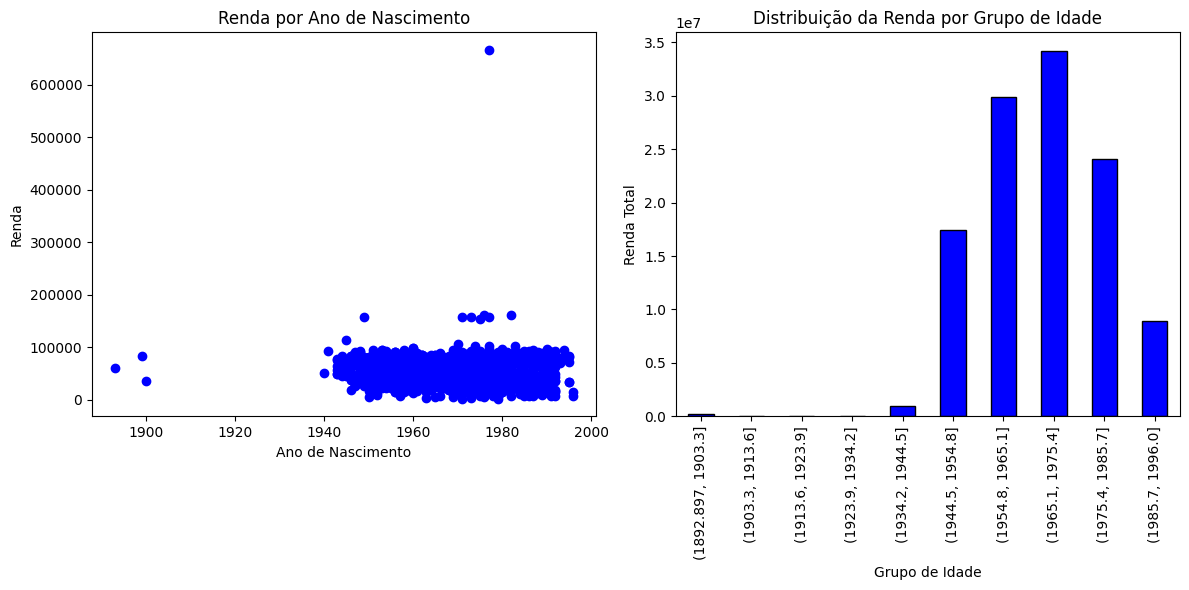

In [68]:
# Cria uma nova coluna para agrupar idades em faixas
df['Age_Group'] = pd.cut(df['Year_Birth'], bins=10)

# Filtra os dados necessários
age_income = df[['Age_Group', 'Income']]

# Cria uma figura e subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersão: Year_Birth no eixo x e Income no eixo y
axs[0].scatter(df['Year_Birth'], df['Income'], color='blue')
axs[0].set_xlabel('Ano de Nascimento')
axs[0].set_ylabel('Renda')
axs[0].set_title('Renda por Ano de Nascimento')

# Histograma de renda por grupos de idade
age_income_groups = age_income.groupby('Age_Group')['Income'].sum()

age_income_groups.plot(kind='bar', ax=axs[1], color='blue', edgecolor='black')
axs[1].set_xlabel('Grupo de Idade')
axs[1].set_ylabel('Renda Total')
axs[1].set_title('Distribuição da Renda por Grupo de Idade')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()


                     MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
NumDealsPurchases     1598828     114249           749936           162496   
NumWebPurchases       3916598     314093          1940121           443173   
NumCatalogPurchases   3211752     283850          2064808           414860   
NumStorePurchases     5515229     474822          2953401           669561   

                     MntSweetProducts  
NumDealsPurchases              119495  
NumWebPurchases                337142  
NumCatalogPurchases            294011  
NumStorePurchases              485847  


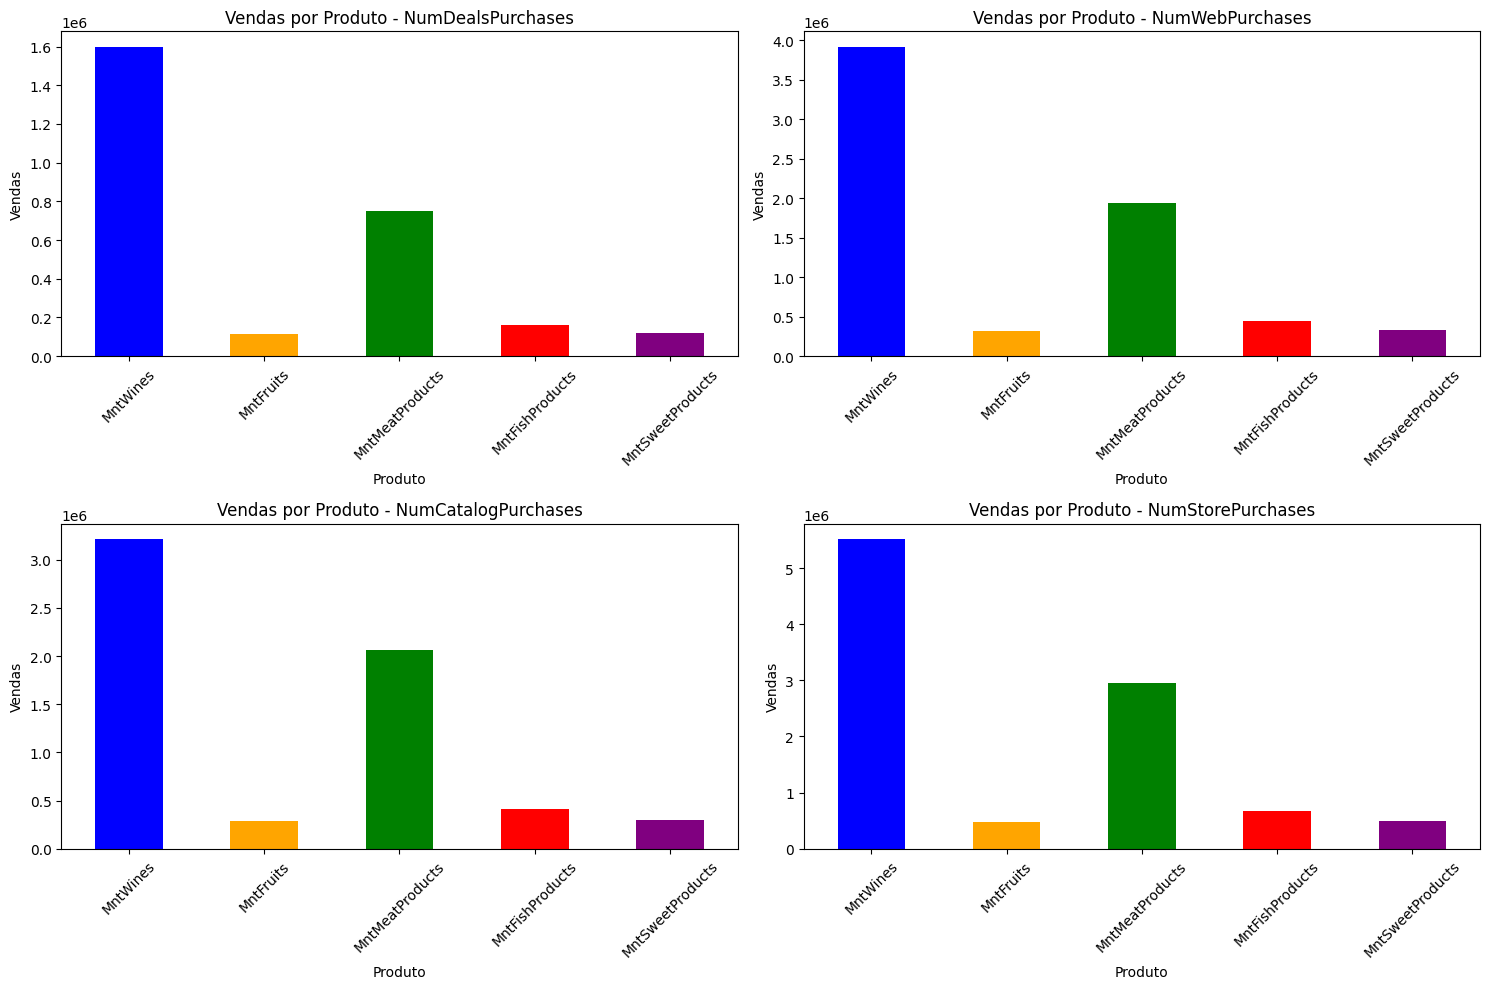

In [69]:
# colunas de interesse
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']
channels = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# DataFrame para armazenar os resultados
results = pd.DataFrame(columns=products, index=channels)

# Calcula a soma das vendas de cada produto por cada canal
for channel in channels:
    for product in products:
        #multiplicamos cada coluna de produtos pela coluna correspondente de canais de vendas e, em seguida, somamos os resultados. Isso calcula a soma das vendas de cada produto por cada canal de vendas.
        results.loc[channel, product] = (df[product] * df[channel]).sum()

# Converte os valores para números inteiros (opcional)
results = results.astype(int)
print(results)
# Cria um gráfico de barras para cada canal de vendas
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

#iterar simultaneamente sobre os eixos dos subplots e os canais de vendas
#O método flat retorna um iterador que percorre todos os eixos em uma única dimensão, independentemente do layout original (por exemplo, 2x2, 3x3, etc.).
#zip: Por exemplo, se axs.flat contiver os eixos [ax1, ax2, ax3, ax4] e channels contiver ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], então zip(axs.flat, channels) produzirá os pares:
# (ax1, 'NumDealsPurchases')
# (ax2, 'NumWebPurchases')
# (ax3, 'NumCatalogPurchases')
# (ax4, 'NumStorePurchases')
for ax, channel in zip(axs.flat, channels):
    results.loc[channel].plot(kind='bar', ax=ax, color=['blue', 'orange', 'green', 'red', 'purple'])
    ax.set_title(f'Vendas por Produto - {channel}')
    ax.set_xlabel('Produto')
    ax.set_ylabel('Vendas')
    ax.set_xticklabels(products, rotation=45)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()
#conseguimos verificar que:
#Vinho se sobresaí em todos os canais de venda como primeiro lugar e carne sempre como segundo.
#seguindo a pergunta feita anteriormente, fazer uma campanha para a galera que vende vinho e carne
#tem mais chances de conseguir venda.

In [70]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,"(1954.8, 1965.1]"
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,"(1944.5, 1954.8]"
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,"(1954.8, 1965.1]"
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,"(1975.4, 1985.7]"
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,"(1975.4, 1985.7]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,"(1965.1, 1975.4]"
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,"(1944.5, 1954.8]"
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,"(1975.4, 1985.7]"
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,"(1954.8, 1965.1]"


In [71]:
num_total_pessoas = len(df)

# Número de respostas positivas
num_respostas_positivas = df['Response'].sum()

# Taxa de resposta observada
taxa_resposta_observada = num_respostas_positivas / num_total_pessoas

print(f"A taxa de resposta observada é: {taxa_resposta_observada * 100:.2f}%")
# O custo total da campanha amostral foi de 6.720MU e a receita
# gerado pelos clientes que aceitaram a oferta foi de 3.674MU. Globalmente, a campanha teve um
# lucro de -3.046MU. A taxa de sucesso da campanha foi de 15%.
# se fizermos os cálculos, apenas 336 clientes aceitaram, isso representa os 15%
# o lucro obtido é de 54.7%, porém foi perdido 45.3%, isso faz com que o lucro seja de 628M
# isso é um valor muito abaixo do esperado, para deixar um valor de campanha mais tranquilo
# é melhor colocar no mínimo 3.000MU que está um pouco abaixo do que foi ganho, e buscar o mesmo público.
# se for buscar uma taxa mínima no olhar mais "ignorante/ambicioso", teria que ser mais de 100%...
# agora, é melhor abaixar o valor da campanha, no mínimo o valor que foi ganho da última, ou até um pouco menos,
# e consiga com clientes semelhantes o mesmo resultado. e para conseguir uma melhor análise, busque conhecer os
# clientes que recusaram as ofertas e verifique o que possa chamar atenção deles.

A taxa de resposta observada é: 14.91%


In [72]:
# Conta o número de ocorrências onde 'MntWines' é maior que zero e 'Response' é igual a 1
num_respostas_mntwines = ((df['MntWines'] > 0) & (df['Response'] == 1)).sum()
num_respostas_positivas = (df['Response'] == 1).sum()
print(df['MntWines'].sum())
print(f"A quantidade de respostas positivas é: {num_respostas_positivas}")

print(f"A quantidade de respostas positivas para 'MntWines' é: {num_respostas_mntwines}")


680816
A quantidade de respostas positivas é: 334
A quantidade de respostas positivas para 'MntWines' é: 334


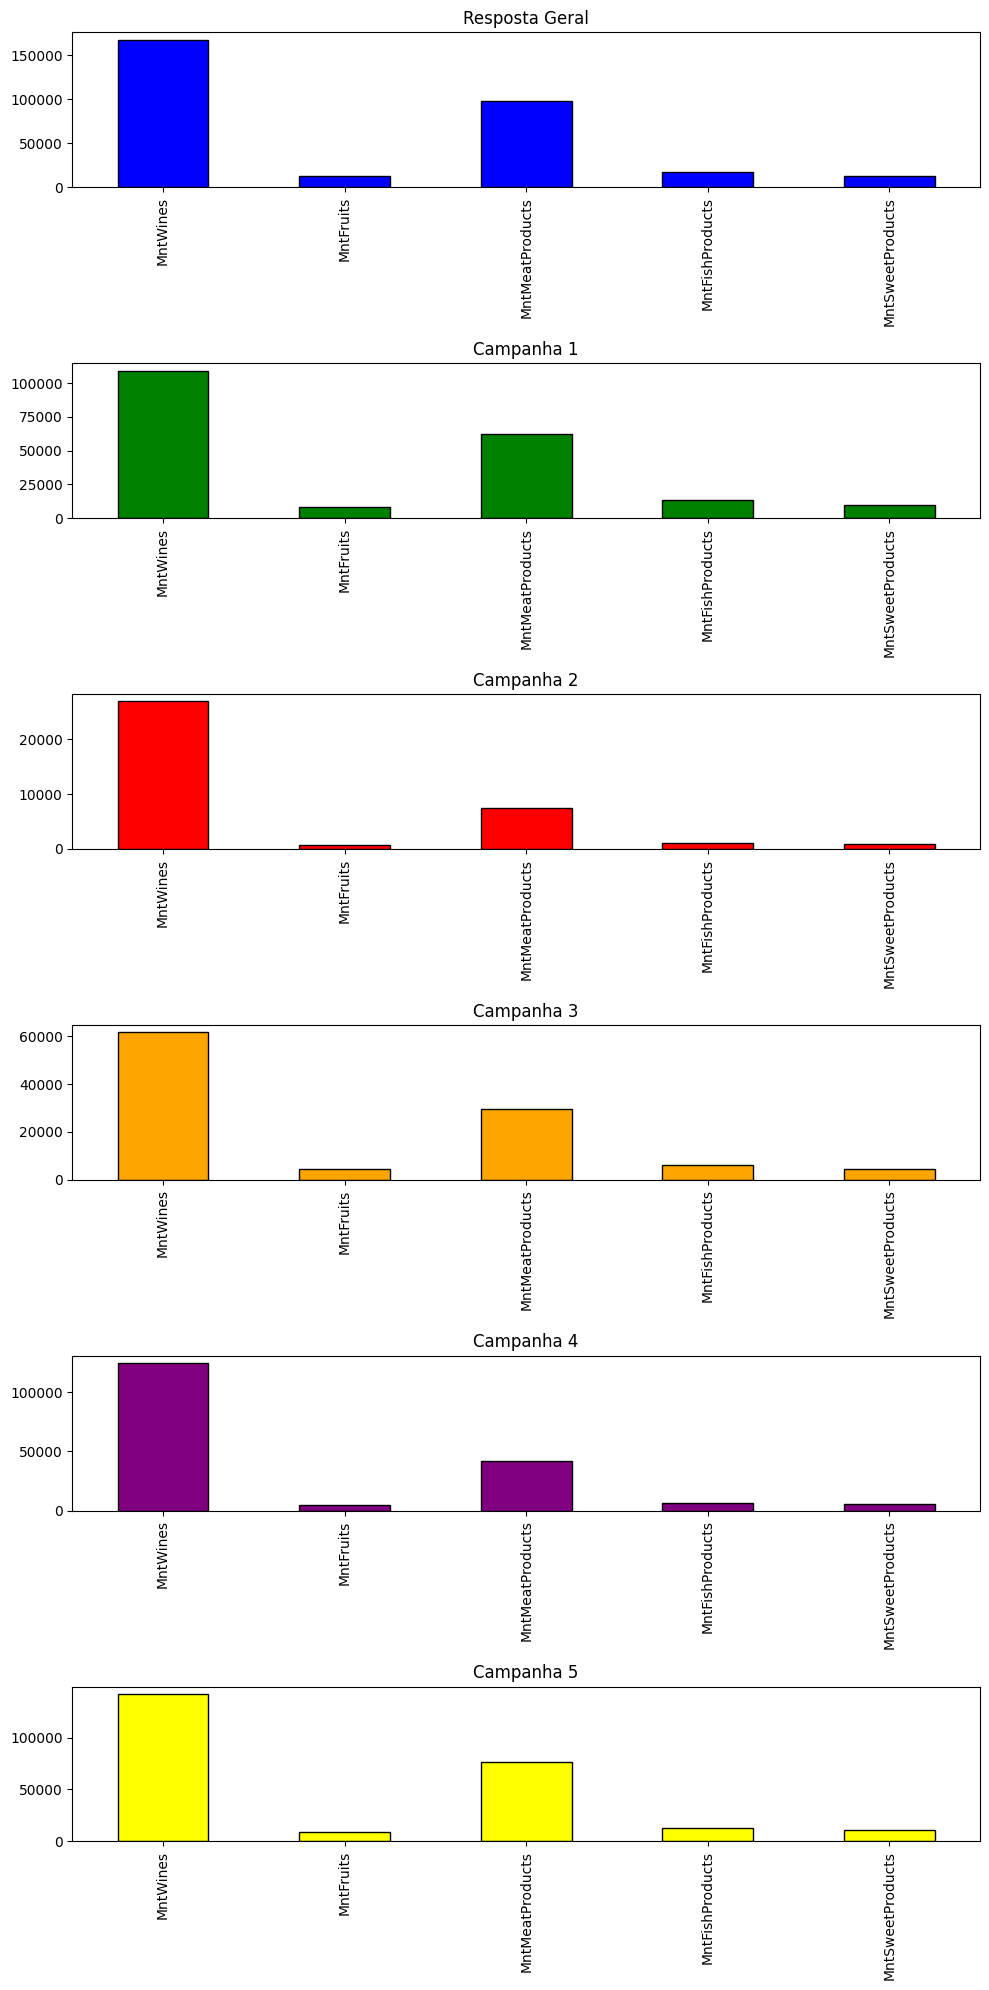

In [83]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']
cols_interesse = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Calcula a quantidade total de respostas positivas para cada produto
response_counts = df[df['Response'] == 1][products].sum()
response_1 = df[df['AcceptedCmp1'] == 1][products].sum()
response_2 = df[df['AcceptedCmp2'] == 1][products].sum()
response_3 = df[df['AcceptedCmp3'] == 1][products].sum()
response_4 = df[df['AcceptedCmp4'] == 1][products].sum()
response_5 = df[df['AcceptedCmp5'] == 1][products].sum()

# Criar uma figura e subplots lado a lado
fig, axs = plt.subplots(6, 1, figsize=(10, 20))

# Cria um gráfico de barras para cada resposta positiva
response_counts.plot(kind='bar', color='blue', edgecolor='black', ax=axs[0])
axs[0].set_title('Resposta Geral')

response_1.plot(kind='bar', color='green', edgecolor='black', ax=axs[1])
axs[1].set_title('Campanha 1')

response_2.plot(kind='bar', color='red', edgecolor='black', ax=axs[2])
axs[2].set_title('Campanha 2')

response_3.plot(kind='bar', color='orange', edgecolor='black', ax=axs[3])
axs[3].set_title('Campanha 3')

response_4.plot(kind='bar', color='purple', edgecolor='black', ax=axs[4])
axs[4].set_title('Campanha 4')

response_5.plot(kind='bar', color='yellow', edgecolor='black', ax=axs[5])
axs[5].set_title('Campanha 5')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()


              Soma MntWines
AcceptedCmp1         109239
AcceptedCmp2          26960
AcceptedCmp3          61721
AcceptedCmp4         124669
AcceptedCmp5         142082
Response             167903


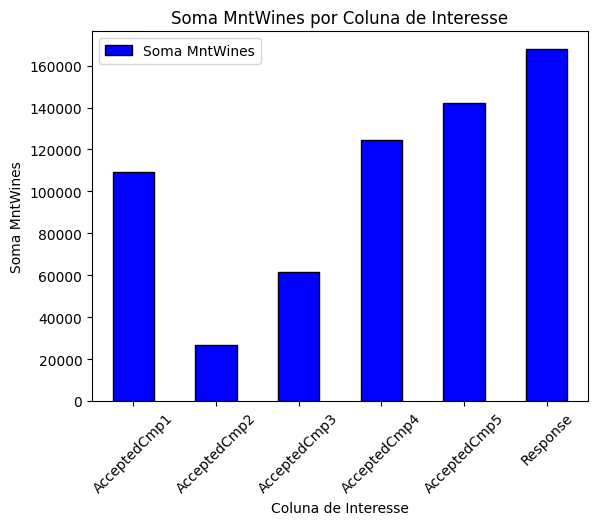

In [93]:
cols_interesse = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Calcular a soma da coluna 'MntWines' para cada valor das colunas de interesse
soma_mnt_wines_por_interesse = {}
for col in cols_interesse:
    soma_mnt_wines_por_interesse[col] = df[df[col] == 1]['MntWines'].sum()

# Criar um DataFrame a partir do dicionário de resultados
df_soma_mnt_wines = pd.DataFrame.from_dict(soma_mnt_wines_por_interesse, orient='index', columns=['Soma MntWines'])
print(df_soma_mnt_wines)
# Plotar os resultados
df_soma_mnt_wines.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Coluna de Interesse')
plt.ylabel('Soma MntWines')
plt.title('Soma MntWines por Coluna de Interesse')
plt.xticks(rotation=45)
plt.show()

#Vimos que o MntWines se destacou em todas as campanhas, teve um crescimento de 53.65% da primeira até a última campanha
#se a cada campanha ele cresce entorno de 10%, podemos dizer que ele pode chegar no mínimo em 184693

In [92]:
# Calcular o crescimento até a última campanha
crescimento_ate_ultima_campanha = df_soma_mnt_wines.diff().iloc[-1].values[0]

# Calcular a variação de cada campanha em relação à anterior
variacao_por_campanha = df_soma_mnt_wines.diff().iloc[:-1]

# Exibir o crescimento até a última campanha e a variação de cada campanha
print(f'Evolução até a última campanha: {crescimento_ate_ultima_campanha}')
print('Variação de cada campanha:')
print(variacao_por_campanha)


Crescimento até a última campanha: 25821.0
Variação de cada campanha em relação à anterior:
              Soma MntWines
AcceptedCmp1            NaN
AcceptedCmp2       -82279.0
AcceptedCmp3        34761.0
AcceptedCmp4        62948.0
AcceptedCmp5        17413.0


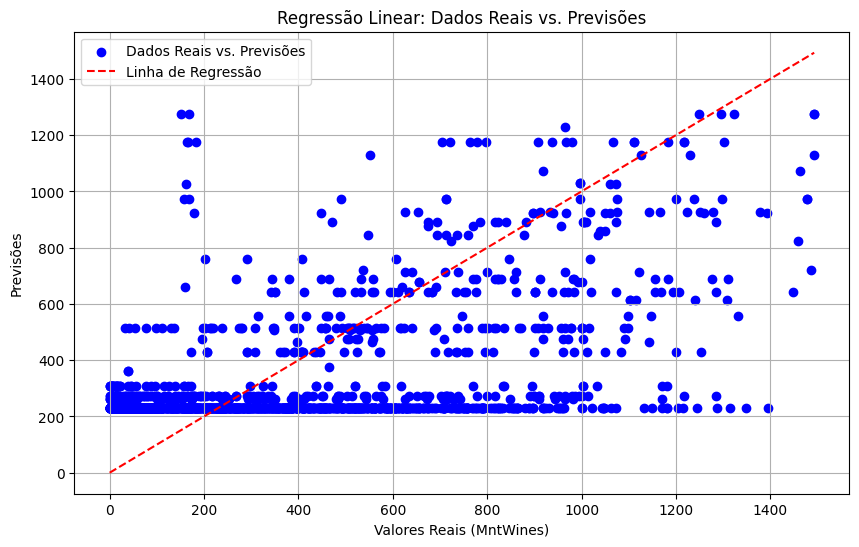

In [88]:
from sklearn.linear_model import LinearRegression

# Seleciona as colunas de interesse e a variável dependente
df_regressao = df[['MntWines'] + cols_interesse]

# Remove linhas com valores ausentes
df_regressao = df_regressao.dropna()

# Divide o conjunto de dados em variáveis independentes (X) e dependente (y)
X = df_regressao[cols_interesse]
y = df_regressao['MntWines']

# Inicializa o modelo de regressão linear
modelo_regressao = LinearRegression()

# Ajusta o modelo aos dados
modelo_regressao.fit(X, y)

# Realiza previsões para os dados de treinamento
previsoes = modelo_regressao.predict(X)

# Plotar os resultados
plt.figure(figsize=(10, 6))

# Gráfico de dispersão com os dados reais
plt.scatter(y, previsoes, color='blue', label='Dados Reais vs. Previsões')

# Plot
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Linha de Regressão')

plt.xlabel('Valores Reais (MntWines)')
plt.ylabel('Previsões')
plt.title('Regressão Linear: Dados Reais vs. Previsões')
plt.legend()
plt.grid(True)
plt.show()
